# Improving Model Performance With Image Augmentation
* Data Preparation is required when working with neural network and deep learning models.
* Increasingly data augmentation is also required on more complex object recognition tasks.

# Keras Image Augmentation API
* **ImageDataGenerator** class
## Capabilities : 
* Feature-wise standardization.
* ZCA whitening.
* Random rotation,shifts,shear and flips.
* Dimension reordering.
* Save augmented images to disk.

### Point of comparison for Image Augmentation


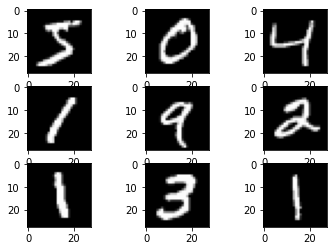

In [11]:
# plot of images as baseline for comparison
from keras.datasets import mnist
from matplotlib import pyplot

# load data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# create a grid of 3*3 images
for i in range(0,9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i],cmap=pyplot.get_cmap('gray'))
pyplot.show()

### 1. Feature Standardization


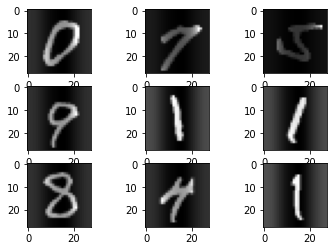

In [12]:
# Standardize images across the dataset, mean=0 and stdev=1
from keras.datasets import mnist
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator

# load data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
x_train = x_train.reshape(x_train.shape[0],1,28,28)
x_test = x_test.reshape(x_test.shape[0],1,28,28)

# convert from int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# define data preparation
datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)

# fit parameters from data
datagen.fit(x_train)

for x_batch,y_batch in datagen.flow(x_train,y_train,batch_size=9):
    # create a grid of 3*3 images
    for i in range(0,9):
        pyplot.subplot(330+1+i)
        pyplot.imshow(x_batch[i].reshape(28,28),cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break

### 2. ZCA Whitening
* A whitening transform of an image is a linear algebra operation that reduces the redundancy in the matrix of pixel images.
* Less redundancy in the image is intended to better highlight the structures and features in the image to the learning algorithm.
* Image whitening is performed using the Principal Component Analysis(PCA).

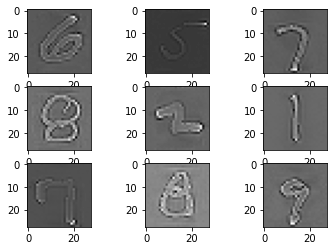

In [13]:
from keras.preprocessing.image import ImageDataGenerator
# load data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
x_train = x_train.reshape(x_train.shape[0],1,28,28)
x_test = x_test.reshape(x_test.shape[0],1,28,28)

# convert from int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# define the data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(x_train)

for x_batch,y_batch in datagen.flow(x_train,y_train,batch_size=9):
    # create a grid of 3*3 images
    for i in range(0,9):
        pyplot.subplot(330+1+i)
        pyplot.imshow(x_batch[i].reshape(28,28),cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break


### 3. Random Rotations
* The below examples creates random rotations of the MNIST digits up to 90 degrees.

/home/kuluruvineeth/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:938: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  warnings.warn(
/home/kuluruvineeth/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/numpy_array_iterator.py:129: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  warnings.warn('NumpyArrayIterator is set to use the '


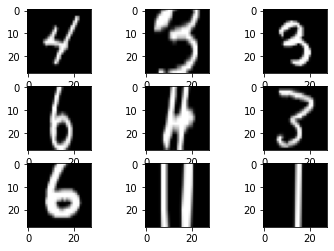

In [14]:
# Random Rotations
from keras.preprocessing.image import ImageDataGenerator
# load data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
x_train = x_train.reshape(x_train.shape[0],1,28,28)
x_test = x_test.reshape(x_test.shape[0],1,28,28)

# convert from int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# define the data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(x_train)

for x_batch,y_batch in datagen.flow(x_train,y_train,batch_size=9):
    # create a grid of 3*3 images
    for i in range(0,9):
        pyplot.subplot(330+1+i)
        pyplot.imshow(x_batch[i].reshape(28,28),cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break


### 4. Random Shifts
* Objects in our images may not be centered in the frame.
* we can handle off-center objects by artificially creating shifted versions of training data.

/home/kuluruvineeth/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:938: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  warnings.warn(
/home/kuluruvineeth/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/numpy_array_iterator.py:129: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  warnings.warn('NumpyArrayIterator is set to use the '


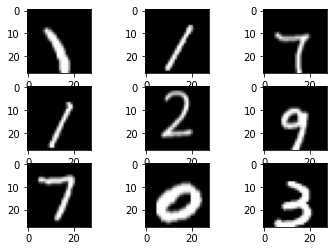

In [16]:
# Random Shifts
from keras.preprocessing.image import ImageDataGenerator
# load data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
x_train = x_train.reshape(x_train.shape[0],1,28,28)
x_test = x_test.reshape(x_test.shape[0],1,28,28)

# convert from int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# define the data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift,height_shift_range=shift)
# fit parameters from data
datagen.fit(x_train)

for x_batch,y_batch in datagen.flow(x_train,y_train,batch_size=9):
    # create a grid of 3*3 images
    for i in range(0,9):
        pyplot.subplot(330+1+i)
        pyplot.imshow(x_batch[i].reshape(28,28),cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break


### 5. Random Flips
* creating random flips of images in our training data.

/home/kuluruvineeth/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:938: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  warnings.warn(
/home/kuluruvineeth/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/numpy_array_iterator.py:129: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  warnings.warn('NumpyArrayIterator is set to use the '


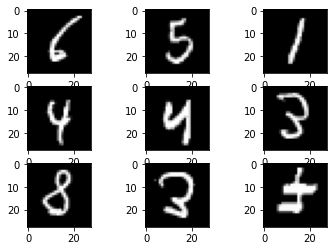

In [17]:
# Random Flips
from keras.preprocessing.image import ImageDataGenerator
# load data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
x_train = x_train.reshape(x_train.shape[0],1,28,28)
x_test = x_test.reshape(x_test.shape[0],1,28,28)

# convert from int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# define the data preparation
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True)
# fit parameters from data
datagen.fit(x_train)

for x_batch,y_batch in datagen.flow(x_train,y_train,batch_size=9):
    # create a grid of 3*3 images
    for i in range(0,9):
        pyplot.subplot(330+1+i)
        pyplot.imshow(x_batch[i].reshape(28,28),cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break


### 6. Saving Augmented Images to File


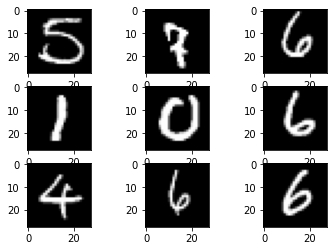

In [31]:
# Save augmented images to file
import os
from keras import backend as K
K.set_image_data_format("channels_first")

# load data
from keras.preprocessing.image import ImageDataGenerator
# load data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
x_train = x_train.reshape(x_train.shape[0],1,28,28)
x_test = x_test.reshape(x_test.shape[0],1,28,28)

# convert from int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# define the data preparation
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(x_train)

# configure batch size and retreive one batch of images
os.makedirs('images')

for x_batch,y_batch in datagen.flow(x_train,y_train,batch_size=9,save_to_dir='images',save_prefix='aug',save_format='png'):
    # create a grid of 3*3 images
    for i in range(0,9):
        pyplot.subplot(330+1+i)
        pyplot.imshow(x_batch[i].reshape(28,28),cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break


# Summary
* Discovered image data preparation and augmentation.
* Learnt about **ImageDataGenerator** API in keras for generating transformed images.